# Image preprocessing test for circle detection

This notebook tests image preprocessing methods that may improve the circle detection results. 

In [28]:
from skimage import io
import matplotlib.pyplot as plt
import cv2
from myImageLib import to8bit, dirrec
import matplotlib.patches as mpatch

In [30]:
print(dirrec('temp', '*.tif'))

['temp/enhance_contrast.tif', 'temp/find_edge.tif', 'temp/raw.tif', 'temp/band_pass.tif']


TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


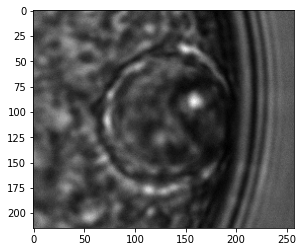

In [36]:
raw = io.imread('temp/raw.tif', as_gray=True)
enhance_contrast = io.imread('temp/enhance_contrast.tif')
find_edge = io.imread('temp/find_edge.tif')
band_pass = io.imread('temp/band_pass.tif')
plt.imshow(raw, cmap='gray')

In [39]:
img = enhance_contrast
Hough_dp = 10
Hough_minDist = 200
Hough_param2 = 10
Hough_maxRadius = 75
Hough_minRadius = 65
circles = cv2.HoughCircles(to8bit(img), cv2.HOUGH_GRADIENT, Hough_dp, Hough_minDist, 
                               param2=Hough_param2, maxRadius=Hough_maxRadius, minRadius=Hough_minRadius)

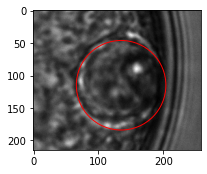

In [40]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(img, cmap='gray')
for c in circles[0]:
    circle_object = mpatch.Circle((c[0], c[1]), c[2],
                                 fill=False, ec='red', lw=1)
    ax.add_patch(circle_object)

In [12]:
for c in circles[0]:
    print(c[0], c[1], c[2])

95.0 75.0 59.0
255.0 205.0 59.0


**Comments:** preprocessing can barely improve the tracking. It's advised to improve the image quality, by, for example, adding dye to the inner oil droplet and image with fluorescence microscopy.